   Unnamed: 0  k  top_k_accuracy  num_correct  total_samples  \
0           0  1        0.244291          353           1445   
1           1  3        0.538408          778           1445   
2           2  5        0.644983          932           1445   

   avg_top_k_confidence  
0              0.507776  
1              0.247437  
2              0.165056  
   Unnamed: 0  k  top_k_accuracy  num_correct  total_samples  \
0           0  1        0.217301          314           1445   
1           1  3        0.496194          717           1445   
2           2  5        0.605536          875           1445   

   avg_top_k_confidence  
0              0.458791  
1              0.229959  
2              0.156190  
   Unnamed: 0  k  top_k_accuracy  num_correct  total_samples  \
0           0  1        0.229066          331           1445   
1           1  3        0.520415          752           1445   
2           2  5        0.641522          927           1445   

   avg_top_k_confiden

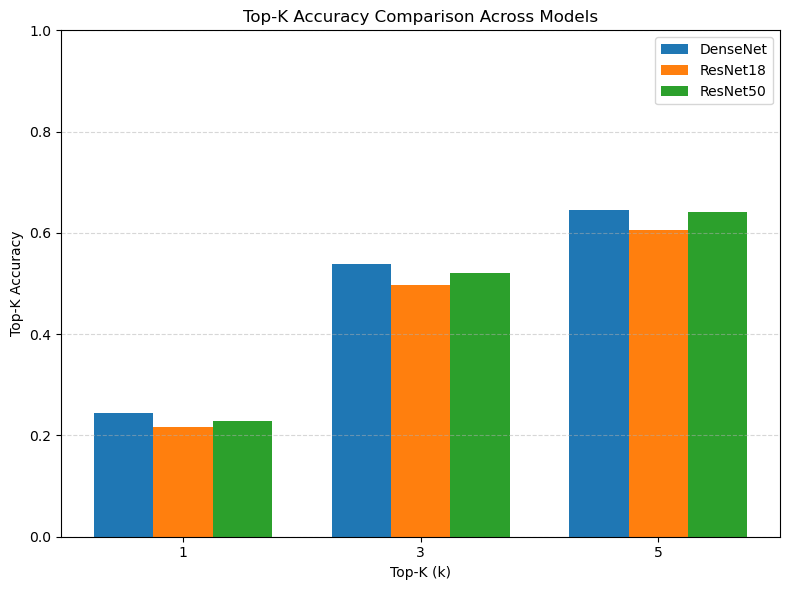

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File paths
files = {
    'DenseNet': 'results_topk_densenet.csv',
    'ResNet18': 'results_topk_resnet18.csv',
    'ResNet50': 'results_topk_resnet50.csv'
}

file2 = {
    'DenseNet': 'custom_densenet.csv',
    'ResNet18': 'custom_resnet18.csv',
    'ResNet50': 'custom_resnet50.csv'
}

# Read data
data = {}
for model_name, file in files.items():
    df = pd.read_csv(file)
    data[model_name] = df.set_index('k')['top_k_accuracy']
    print(df)

# Convert to DataFrame for easy plotting
plot_df = pd.DataFrame(data)

# Bar chart setup
x = np.arange(len(plot_df))  # positions for k
width = 0.25  # width of each bar

fig, ax = plt.subplots(figsize=(8,6))

# Plot bars
ax.bar(x - width, plot_df['DenseNet'], width, label='DenseNet')
ax.bar(x, plot_df['ResNet18'], width, label='ResNet18')
ax.bar(x + width, plot_df['ResNet50'], width, label='ResNet50')

# Labels and title
ax.set_xlabel('Top-K (k)')
ax.set_ylabel('Top-K Accuracy')
ax.set_title('Top-K Accuracy Comparison Across Models')
ax.set_xticks(x)
ax.set_xticklabels(plot_df.index)
ax.set_ylim(0, 1)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('topk_accuracy_comparison_bar.png', dpi=300)
plt.show()


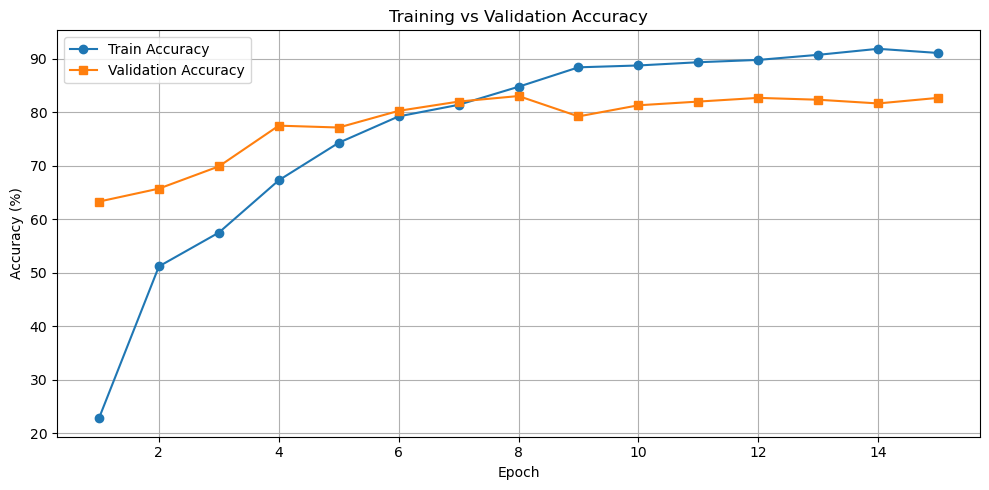

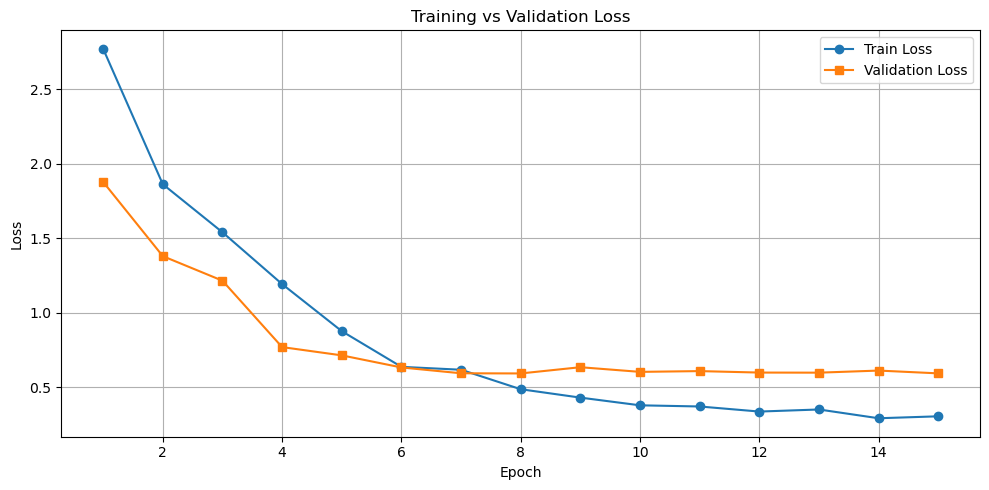

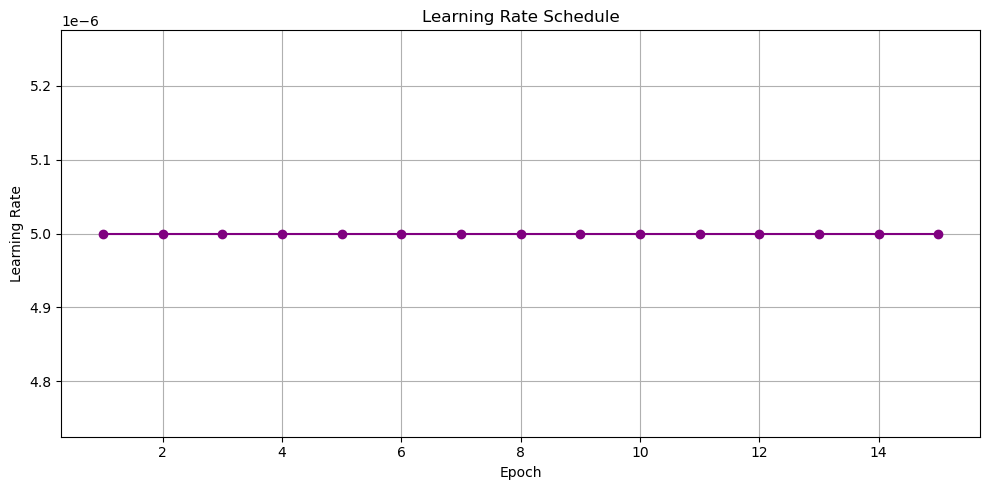

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv('metrics.csv')

# Plot Accuracy
plt.figure(figsize=(10,5))
plt.plot(df['epoch'], df['train_acc'], marker='o', label='Train Accuracy')
plt.plot(df['epoch'], df['val_acc'], marker='s', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training vs Validation Accuracy')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('accuracy_curve.png', dpi=300)
plt.show()

# Plot Loss
plt.figure(figsize=(10,5))
plt.plot(df['epoch'], df['train_loss'], marker='o', label='Train Loss')
plt.plot(df['epoch'], df['val_loss'], marker='s', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('loss_curve.png', dpi=300)
plt.show()

# Optional: Learning rate curve
plt.figure(figsize=(10,5))
plt.plot(df['epoch'], df['lr'], marker='o', color='purple')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.grid(True)
plt.tight_layout()
plt.savefig('lr_curve.png', dpi=300)
plt.show()


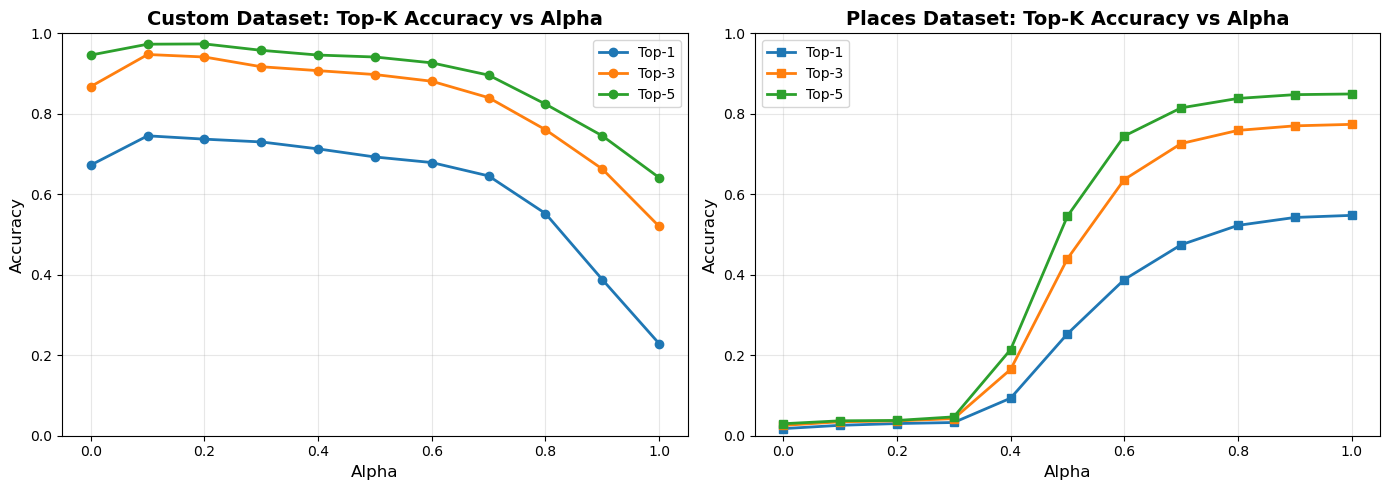

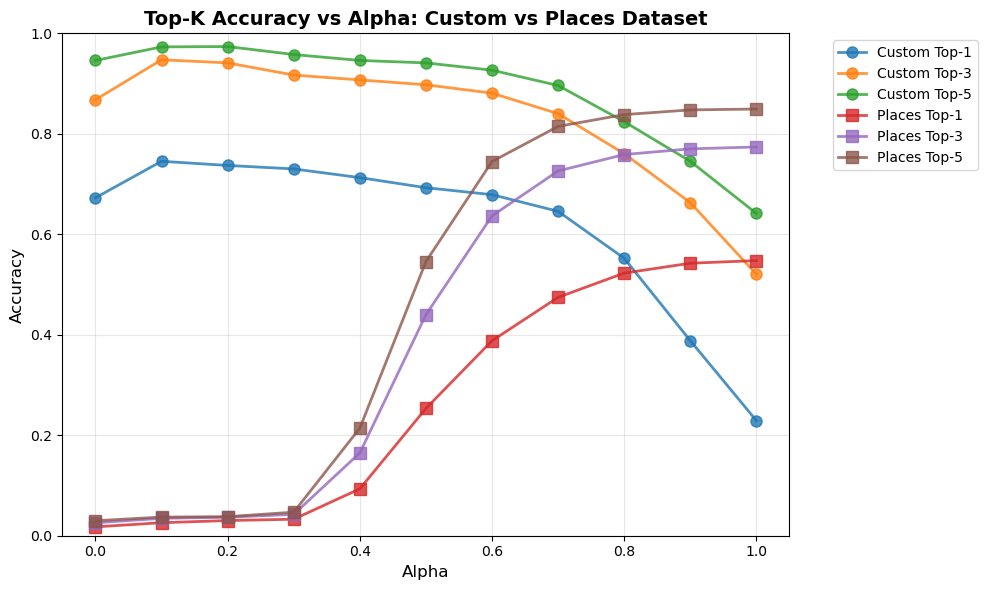


Summary Statistics:

Custom Dataset:
k            1         3         5
mean  0.616798  0.831205  0.888330
min   0.229066  0.520415  0.641522
max   0.745329  0.947405  0.973702

Places Dataset:
k            1         3         5
mean  0.266247  0.400882  0.455121
min   0.017671  0.025644  0.029808
max   0.547644  0.773808  0.849315

Plots saved successfully!


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ===============================
# Load new combined CSV
# ===============================
csv_file = "topk_against_alphas_ensemble.csv"   # <-- change filename if needed

df = pd.read_csv(
    csv_file,
    header=[0, 1],    # multi-level columns
    index_col=0       # alpha
)

df.index.name = "alpha"

# Ensure k level is int
df.columns = df.columns.set_levels(
    df.columns.levels[1].astype(int),
    level=1
)

# ===============================
# Split datasets
# ===============================
places_df = df["places"]
custom_df = df["custom"]

# ===============================
# Plot: Separate subplots
# ===============================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ---- Custom ----
for k in [1, 3, 5]:
    axes[0].plot(
        custom_df.index,
        custom_df[k],
        marker='o',
        label=f'Top-{k}',
        linewidth=2
    )

axes[0].set_xlabel('Alpha', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Custom Dataset: Top-K Accuracy vs Alpha',
                  fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim([0, 1])

# ---- Places ----
for k in [1, 3, 5]:
    axes[1].plot(
        places_df.index,
        places_df[k],
        marker='s',
        label=f'Top-{k}',
        linewidth=2
    )

axes[1].set_xlabel('Alpha', fontsize=12)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].set_title('Places Dataset: Top-K Accuracy vs Alpha',
                  fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim([0, 1])

plt.tight_layout()
plt.savefig('topk_accuracy_vs_alpha.png', dpi=300, bbox_inches='tight')
plt.show()

# ===============================
# Combined plot
# ===============================
fig, ax = plt.subplots(figsize=(10, 6))

markers = {'Custom': 'o', 'Places': 's'}

for dataset, data in zip(
    ['Custom', 'Places'],
    [custom_df, places_df]
):
    for k in [1, 3, 5]:
        ax.plot(
            data.index,
            data[k],
            marker=markers[dataset],
            label=f'{dataset} Top-{k}',
            linewidth=2,
            markersize=8,
            alpha=0.8
        )

ax.set_xlabel('Alpha', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Top-K Accuracy vs Alpha: Custom vs Places Dataset',
             fontsize=14, fontweight='bold')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_ylim([0, 1])

plt.tight_layout()
plt.savefig('topk_accuracy_vs_alpha_combined.png',
            dpi=300, bbox_inches='tight')
plt.show()

# ===============================
# Summary statistics
# ===============================
print("\nSummary Statistics:")
print("\nCustom Dataset:")
print(custom_df.agg(['mean', 'min', 'max']))

print("\nPlaces Dataset:")
print(places_df.agg(['mean', 'min', 'max']))

print("\nPlots saved successfully!")
